# ロジスティック回帰
参考：『Pattern Recognition and Machine Learning』(ChristopherBishop)

https://www.microsoft.com/en-us/research/people/cmbishop/prml-book/
## 準備
シグモイド関数の定義
$$
\sigma(x) = \frac{1}{1 + \exp(-x)}
$$

導関数
$$
\frac{d}{dx} \sigma(x) = \sigma(x) (1 - \sigma(x))
$$

ロジット関数の定義
$$
\mathrm{logit}(x) = \log \frac{x}{1 - x}
$$

ロジット関数にシグモイド関数を代入
$$
\mathrm{logit}(\sigma(x)) = x
$$

## モデル
入力$x$と教師データ$t$との関係を以下のようにモデル化する．
$$
p(t_i | x_i , \omega)  = \sigma(\omega^T x_i)^{t_i} (1 - \sigma(\omega^T x_i))^{1-t_i} \\
$$
つまり，$t_i$が1のときは$\sigma(\omega^T x_i)$，0のときは$\{1 - \sigma(\omega^T x_i)\}$となる確率分布に従うとする．(ベルヌーイ分布)

教師ありデータセットが得られたとき，$t$の同時分布に関する対数尤度は
$$
\log p(t | \omega) = \sum_{i=1}^N \{ t_i \log \sigma(\omega^T x_i) + (1 - t_i) \log (1 - \sigma(\omega^T x_i)) \}
$$
となり交差エントロピーとなる．これを最大化することがロジスティック回帰となる．

失関数$E$は対数尤度にマイナスを付ける．学習とは，この損失関数を最小化することになる．

一回微分は
$$
\frac{\partial E}{\partial \omega} = - \sum_{i=1}^N \{ \sigma(\omega^T x_i) - t_i \} x_i
$$

とかんたんになるため，一般的な方法として勾配降下法を用いてパラメータを更新することが多い．

## 実装例

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# データ生成
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, \
                           n_redundant=0, random_state=123, n_clusters_per_class=1)

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# データのスケーリング
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

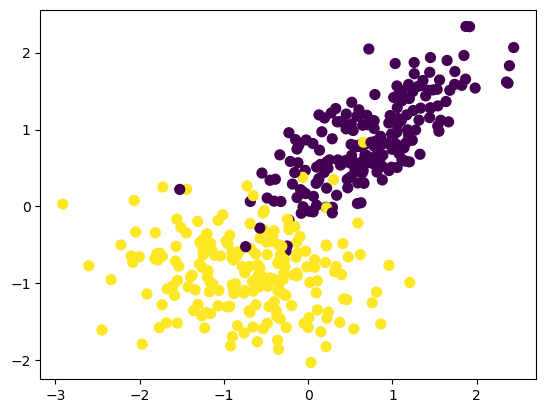

In [2]:
# データの可視化
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', s=50)
plt.show()

In [3]:
# ロジスティック回帰モデルの学習
model = LogisticRegression(penalty='l2', \
                           C = 1.0 \
                            )
model.fit(X_train, y_train)

# テストデータに対する予測
y_pred = model.predict(X_test)

# 結果の評価
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.94


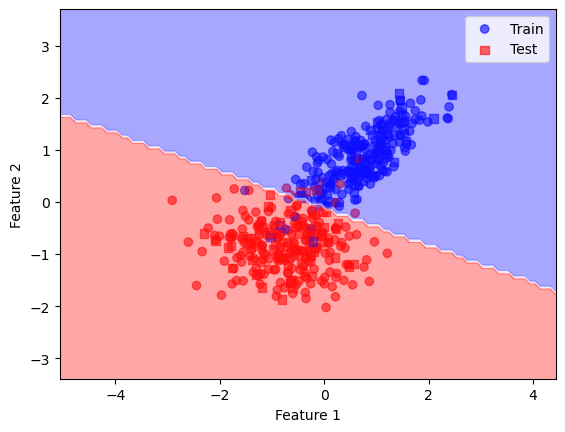

In [4]:
# 散布図の描画
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', alpha=0.6, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', alpha=0.6, marker='s', label='Test')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# 決定境界の描画mu , var
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap='bwr')

plt.show()